In [9]:
indir='./results/f0_ae_train_1kg_val_1kg'
epoch=228
# indir='./results/ae_train_1kg_val_1kg_f0'
# epoch=107

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
fn = f'{indir}/confusion_matrix_epoch{epoch}.csv'
conf_mat = pd.read_csv(fn,header=None)
# print(conf_mat)
conf_mat = np.array(conf_mat)
total = np.sum(conf_mat)
print(total)

# calculate the accuracy
accuracy = np.sum(np.diag(conf_mat)) / total
print(accuracy)

99.9998
0.7949245898491798


In [12]:
fn = f'{indir}/confusion_matrix_bubble_epoch{epoch}.csv'

conf_mat = pd.read_csv(fn,header=None)
print(conf_mat)
conf_mat = np.array(conf_mat)
# rows are predicted, columns are expected

         0        1        2        3        4        5        6     7   \
0   92.5926   0.0000   0.0000   0.0000   0.0000   3.7037   0.0000   0.0   
1    0.0000  50.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0   
2    0.0000   0.0000  88.8889   0.0000   0.0000   0.0000   0.0000  25.0   
3    0.0000   0.0000   0.0000  71.4286  15.1515   0.0000   0.0000   0.0   
4    0.0000  11.1111   0.0000  19.0476  84.8485   0.0000   0.0000   0.0   
5    0.0000   0.0000   0.0000   0.0000   0.0000  77.7778   0.0000   0.0   
6    0.0000   0.0000   0.0000   0.0000   0.0000   0.0000  65.5172   0.0   
7    0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000  75.0   
8    0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0   
9    0.0000   0.0000   3.7037   0.0000   0.0000   3.7037   0.0000   0.0   
10   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0   
11   0.0000  38.8889   0.0000   9.5238   0.0000   0.0000   0.0000   0.0   
12   0.0000   0.0000   0.

In [13]:
populations = [
    'BEB', 'CDX', 'CEU+GBR', 'CHB', 'CHS', 'CLM', 'ESN', 'FIN', 'GWD', 
    'IBS', 'JPT', 'KHV', 'LWK', 'MSL', 'PEL', 'PJL', 'PUR', 'TSI', 'YRI']
labels = populations
print(labels)

['BEB', 'CDX', 'CEU+GBR', 'CHB', 'CHS', 'CLM', 'ESN', 'FIN', 'GWD', 'IBS', 'JPT', 'KHV', 'LWK', 'MSL', 'PEL', 'PJL', 'PUR', 'TSI', 'YRI']


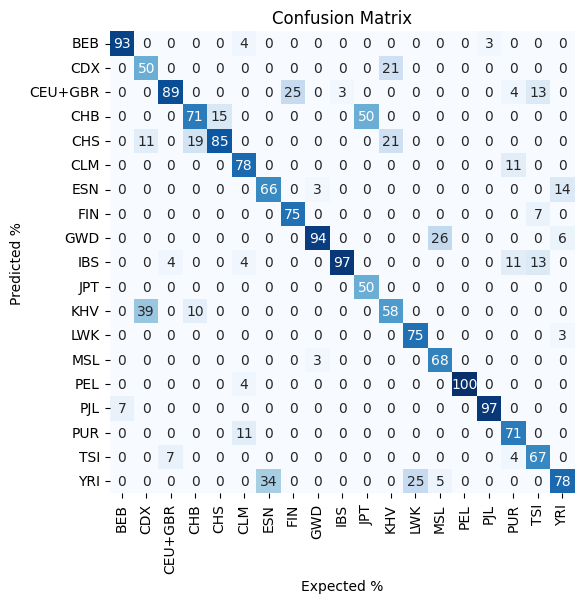

In [14]:
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', cbar=False, 
            xticklabels=labels, yticklabels=labels, fmt='.0f')
plt.title('Confusion Matrix')
plt.xlabel('Expected %')
plt.ylabel('Predicted %')
plt.show()

In [15]:
def get_power(df, degree=0):
    # df is a pandas dataframe of shape (n_classes, n_classes)
    # power: among the expected positive, how many are predicted related
    # rows are expected, columns are predicted
    expected_pos = df.iloc[degree, :].sum()
    predicted_pos = df.iloc[:, degree].sum()
    true_pos = df.iloc[degree, degree]
    predicted_unrelated = df.iloc[degree, 0].sum()
    power = 1 - (predicted_unrelated/expected_pos)
    recall = true_pos/expected_pos
    precision = true_pos/predicted_pos
    f1 = 2*precision*recall/(precision+recall)
    return power*100, recall*100, precision*100, f1*100


In [16]:
def get_F1_score(conf_mat):
    # conf_mat is a numpy array of shape (n_classes, n_classes)
    # rows are predicted, columns are expected
    # return a list of F1 scores for each class
    df = conf_mat.T # rows are expected, columns are predicted
    df = pd.DataFrame(df)
    F1_scores = []
    for i in range(df.shape[0]):
        F1_scores.append(get_power(df, i)[3])
    return F1_scores

f1 = get_F1_score(conf_mat)
[print(i,j) for i,j in zip(labels, f1)]

overall_F1 = np.mean(f1)
print(f'Overall F1 score: {overall_F1}')

BEB 92.76439966818548
CDX 58.53659678762864
CEU+GBR 75.96712067461073
CHB 60.38428422339833
CHS 71.95413849614465
CLM 82.52632338437526
ESN 71.92424797141788
FIN 82.56879218921243
GWD 83.46248914127958
IBS 84.80439838548266
JPT 66.66666666666666
KHV 56.42994613194263
LWK 84.37498945312632
MSL 79.93165847931355
PEL 98.18181996694217
PJL 94.73686273760363
PUR 78.26089338374062
TSI 75.05588376851652
YRI 64.14031771714045
Overall F1 score: 76.98272785403833
